<a href="https://colab.research.google.com/github/afscomercial/big-data-fundamental/blob/main/assigment-one/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CBD 2214 1 - Big Data Fundamentals Data Storage Networking
## Assignment 2: Classification and semi-supervised learning

Group 2:
* Andrea Franco C0931897
* Andres Salguero C0932873
* Harpreet Kaur 

## I) Business Case Evaluation: Seoul Bike Demand Prediction

**Justification & Motivation:**

The **scope** of this project is to predict the demand of bikes for a shop in the city of Seoul, Korea.

The **motivation** behind this project is to help the bike store to predict how many bikes should have available for rent depending on the weather condition.

In order to know which business challenges the analysis will tackle, we can stablish certain key points that will help us to guide the data analysis in a effective way and evaluate the success of our model:

**The problem** we will be tackling is the inconsistent bike availability due to unpredictable demand which leads to lost revenue (bikes unavailable during peak times) and customer unsatisfaction (unavailable bikes or too few choices).

**The solution** is the development of a bike rental demand prediction model using historical rental data and available weather information to train the model.

**Business Challenges Tackled:**

The specific business challenges that we will be helping to tackle are:

* **Demand forecasting**
* **Inventory management**
* **Customer experience**

**Goals:**

The goals that we will be targeting are:

* **Reduce lost revenue:** Make accurate predictions of peak demand periods to ensure enough bikes are available for rent. 
* **Improve customer satisfaction:** Minimize wait times and ensure an adequate number of bikes are available when needed.
* **Optimize operational efficiency:** Reduce unnecessary bike replenishment, saving time and resources.


**Key Performance Indicators (KPIs):**

Once the model has been deployed, the following KPIs could be proposed to evaluate the performance of the solution, creating a new phase of the project in which the dataset is fed with new data, and re-trained to give better results.

* **Bike rental revenue:** Track changes in revenue after implementing the prediction model.
* **Bike availability:** Monitor the difference between the number of bikes available for rent and the rent demand, specially during peak hours. 
* **Customer satisfaction:** Conduct surveys to measure customer experience.
* **Operational efficiency:** Track the time and resources spent on replenish bikes across locations.



## II) Data Identification

The next phase of the project is data identification which involves describing the specific datasets required to build our bike rental demand prediction model. As this project will focus on identifying data sources that provide historical information on bike rentals and relevant weather conditions in Seoul, Korea, the "Seoul Bike Sharing Demand Prediction" (E et al., 2020) will have enough data to take a first approach into the data analysis and development of our regression model.

This dataset provide us with information about historical public bike rental from the government of Korea and weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall). 

This data was obtained from [Kaggle Website](https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction) but the acknowledgments cite the original paper from which it was obtained at the Mendeley database and the original paper at Science Direct (E et al., 2020).

In order to create a more robust model, other types of dataset could be used for a second approach of the problem, getting data from both internal an external data sources, being internal data those coming from the bike rental companies interested in getting a better performance for their business, for instance:

**Internal Data Sources:** 
    
* Daily or hourly rental records
* Bike type (e.g., road bike, mountain bike)
* Pickup and drop-off locations
* Customer information (optional, anonymized)

**External Data Sources:**

Publicly available weather datasets for Seoul, Korea. Potential sources include:

* South Korean national weather service websites
* Open-source weather data repositories like [National Oceanic and Atmospheric Administration (NOAA) ](https://www.noaa.gov/climate)
* Weather APIs offered by private companies

Depending on the chosen data sources, it might be need to integrate data from multiple sources and make some preprocessing to ensure consistency before feeding it into our model.



## III) Data Acquisition and Filtering

In this stage, the main objective is to acquire the necessary data and filter it to ensure quality and relevance. The process involves sourcing the data from identified internal and external sources,  removing noise and inconsistencies, and filtering it to retain only the data pertinent to the bike demand prediction model.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import warnings
 
warnings.filterwarnings('ignore')


In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/assigment-one/SeoulBikeData.csv", encoding='unicode_escape')

In [46]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

## IV) Data Extraction

The Data Extraction stage focuses on extracting and transforming data from various sources into a format suitable for the Big Data solution. This involves handling different data formats and ensuring compatibility with the analytics tools used for further processing and analysis. The extraction process must accommodate the diverse nature of data, especially when dealing with external sources, ensuring it is transformed into a structured and consistent format.

To transform data into a consistent format, the date column will be converted to a datetime object.
This allows to efficiently handle, manipulate, and extract useful features from the date information.

In [48]:
# Convert 'Date' column to datetime with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

For this stage, we decided to remove special characters from dataset labels to simplify the referencing in code, ensuring compatibility with various tools and systems, improving readability and maintainability, and avoids potential issues with database integration and data analysis operations.

In [49]:
# Rename columns to remove special characters
df.rename(columns={
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'Dew point temperature',
    'Solar Radiation (MJ/m2)': 'Solar Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall'
}, inplace=True)

Also for this case in particular that a classification algorithm will be used, it is needed to do feature engineering in order to obtain a target feature with classes instead of continuos values.

In [50]:
df['Rented Bike Count'].mean()

704.6020547945205

In [51]:
# Create a new column 'Above_700' with 1 if 'Values' > 700, otherwise 0
df['Rented above mean'] = df['Rented Bike Count'].apply(lambda x: 1 if x > 700 else 0)
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rented above mean
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,1


## V) Data cleansing and validation

This process helps in removing inconsistent data from our dataset so that we can gain better insights on our data which could lead to better analysis.For this we will use functions like isnull, duplicated() so that if data has any consistency it can be removed.in this dataset we did not drop any value because all the values are useful in this dataset for our analysis. Also we will transform our qualitative feature to quantitative features,these features would be Seasons,Holiday,Function Day .In order to validate our data to make sure that whether it is according to the structure that we need, to check whether it will require any removal of the inaccurate data and to check the relationship within the features in our dataset. To ensure this we had to remove the missing value or duplicate values in our dataset using nunique() function.

In [52]:
# checking for null values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Rented above mean        0
dtype: int64

*** As there are no null values in our dataset we don't need to drop any values

In [53]:
df.nunique()

Date                      365
Rented Bike Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1789
Dew point temperature     556
Solar Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
Rented above mean           2
dtype: int64

### Converting qualitative features into quantitative
  Here Seasons, Holiday and Functioning Day features are converted into Quantitative feature.



In [54]:
numerical_df = pd.DataFrame(df)

In [55]:
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)

In [56]:
# Perform one-hot encoding
one_hot = pd.get_dummies(df['Seasons'], prefix='Seasons', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded columns
numerical_df = pd.concat([numerical_df, one_hot], axis=1)

# Drop the original 'Labels' column if you no longer need it
numerical_df.drop('Seasons', axis=1, inplace=True)

numerical_df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Functioning Day,Rented above mean,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes,1,1,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes,1,1,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes,0,1,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes,1,1,0,0,0


In [57]:
# converting Holiday type
numerical_df['Holiday'] = le.fit_transform(numerical_df['Holiday'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)



{0: 'Holiday', 1: 'No Holiday'}


In [58]:
# converting Functioning Day type
numerical_df['Functioning Day'] = le.fit_transform(numerical_df['Functioning Day'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)


{0: 'No', 1: 'Yes'}


## VI) Data Representation and Aggregation

This process include representing and aggregating our data. Data aggregation is basically a process to combine multiple dataset into one single dataset so that it will make our analysis easier to work with. This step is important as it processes the large amount of data in less time. However in our case this step will not be included as we do not have any multiple data set in our analysis and the data is in the format of csv file.

## VII) Data analysis

### 1. Target variable Exploration

The primary objective of this project is to predict the demand for bikes at a rental shop in Seoul, Korea. The target variable, Rented Bike Count, represents the number of bikes rented per hour. Accurate predictions of this target variable will help the bike rental shop manage inventory more efficiently, ensuring that enough bikes are available during peak times and reducing instances of unavailability. This, in turn, will help increase revenue and improve customer satisfaction.

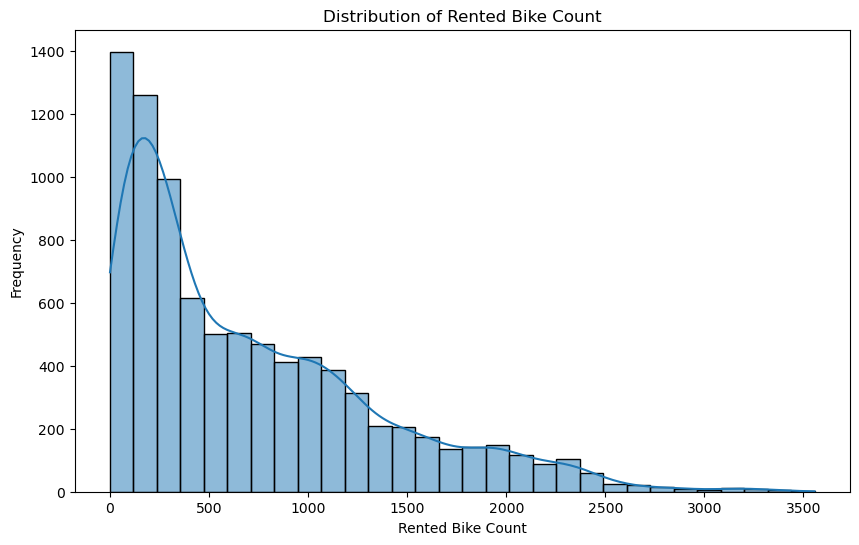

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(numerical_df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

In [60]:
numerical_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Time series analysis of Rented Bike Count

The time series analysis of the target variable, Rented Bike Count, will provide insights into the trends, seasonality, and patterns in bike rentals over time. This analysis will help identify the factors that influence bike rental demand, such as weather conditions, day of the week, and time of day. Understanding these patterns will enable the development of a predictive model that can accurately forecast bike rental demand.

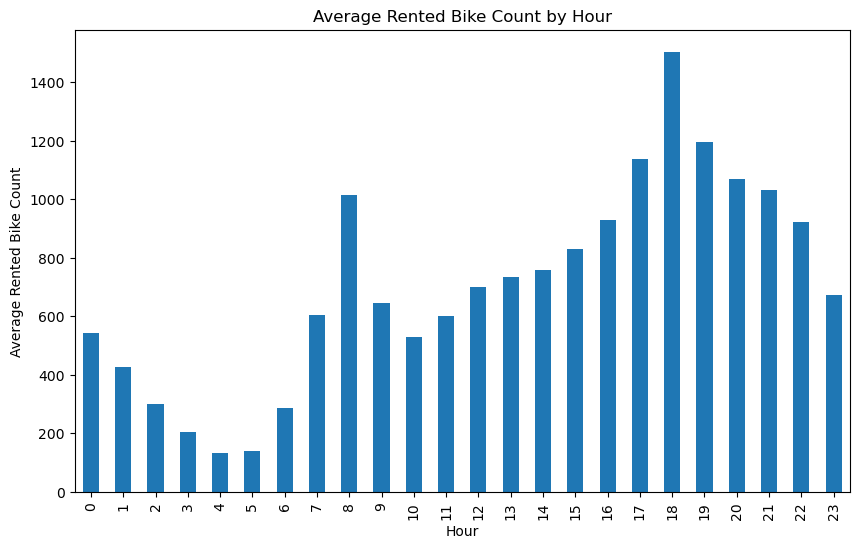

In [61]:
# Hourly trends
hourly_counts = numerical_df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.show()

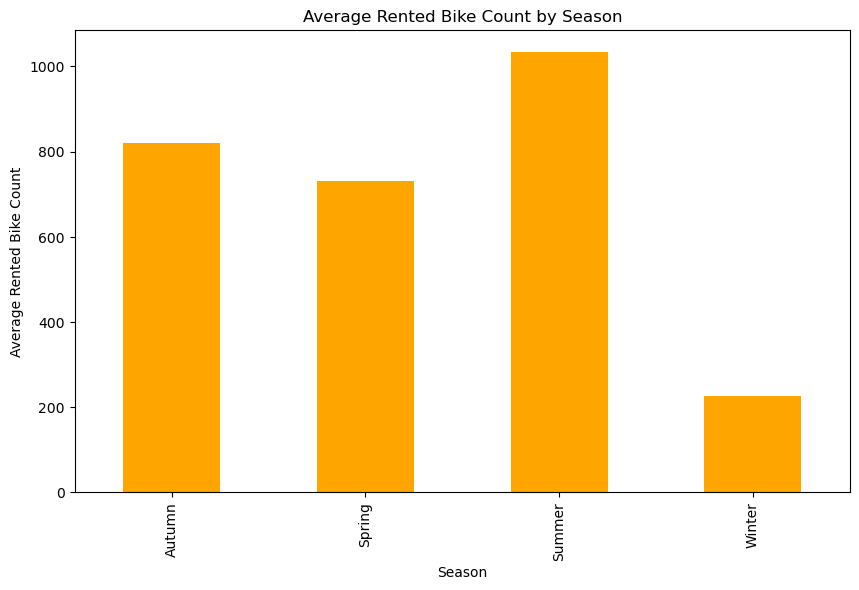

In [62]:
# Seasonal trends
seasonal_counts =df.groupby('Seasons')['Rented Bike Count'].mean()

plt.figure(figsize=(10, 6))
seasonal_counts.plot(kind='bar', color='orange')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()

### Handling outliers

There may be some values that could affect the performance of the model as they are unusually out of the range of most of the values. For this, it is needed to identify and delete the outliers from the target feature.

<Axes: >

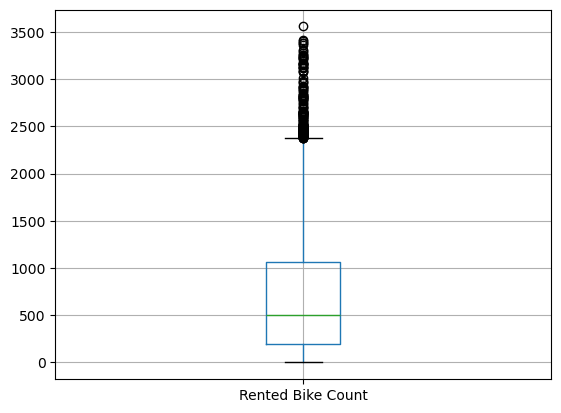

In [63]:
numerical_df.boxplot(column = ['Rented Bike Count'])

In [64]:
numerical_df[numerical_df['Rented Bike Count'] > 2400].count()

Date                     147
Rented Bike Count        147
Hour                     147
Temperature              147
Humidity                 147
Wind speed               147
Visibility               147
Dew point temperature    147
Solar Radiation          147
Rainfall                 147
Snowfall                 147
Holiday                  147
Functioning Day          147
Rented above mean        147
Seasons_Autumn           147
Seasons_Spring           147
Seasons_Summer           147
Seasons_Winter           147
dtype: int64

In [65]:
print(f'The values above 2300 only represent a {round((147/len(df))*100,2)} % of the data')

The values above 2300 only represent a 1.68 % of the data


As the values above 2400 only represent a 1.68 % of the data they can be considered outliers and we can remove them as they may affect our prediction results.

In [66]:
numerical_df = numerical_df[numerical_df['Rented Bike Count'] < 2400]
numerical_df.describe()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Functioning Day,Rented above mean,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
count,8612,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000
mean,2018-05-31 09:19:08.722712320,669.966558,11.384347,12.686600,58.366117,1.716210,1432.263470,3.926080,0.568838,0.151231,0.076359,0.949954,0.965745,0.393056,0.249768,0.252787,0.246633,0.250813
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-02-28 00:00:00,189.000000,5.000000,3.200000,42.000000,0.900000,929.750000,-4.900000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018-05-30 00:00:00,486.000000,11.000000,13.300000,57.000000,1.500000,1690.000000,4.850000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018-08-31 00:00:00,1032.000000,17.000000,22.200000,74.000000,2.300000,2000.000000,14.700000,0.930000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2018-11-30 00:00:00,2398.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,592.108500,6.921259,11.937076,20.448986,1.038046,610.049779,13.099392,0.874162,1.137678,0.440372,0.218053,0.181893,0.488457,0.432904,0.434635,0.431076,0.433506


### 2. Numerical variable exploration

On the other hand, we can search for insights in the numerical variables using the describe method to obtain statistical information about them and a correlation heatmap to see the relations between features.

In [67]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Rented Bike Count') 

# Summary statistics of numerical variables
print(df[numerical_cols].describe())

              Hour  Temperature     Humidity   Wind speed   Visibility  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     11.500000    12.882922    58.226256     1.724909  1436.825799   
std       6.922582    11.944825    20.362413     1.036300   608.298712   
min       0.000000   -17.800000     0.000000     0.000000    27.000000   
25%       5.750000     3.500000    42.000000     0.900000   940.000000   
50%      11.500000    13.700000    57.000000     1.500000  1698.000000   
75%      17.250000    22.500000    74.000000     2.300000  2000.000000   
max      23.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew point temperature  Solar Radiation     Rainfall     Snowfall  \
count            8760.000000      8760.000000  8760.000000  8760.000000   
mean                4.073813         0.569111     0.148687     0.075068   
std                13.060369         0.868746     1.128193     0.436746   
min               -30.600000     

It is also important to plot the values of the numerical variables versus the target feature, as it may reveal some type of relation (linea, polinomial)

ValueError: num must be an integer with 1 <= num <= 9, not 10

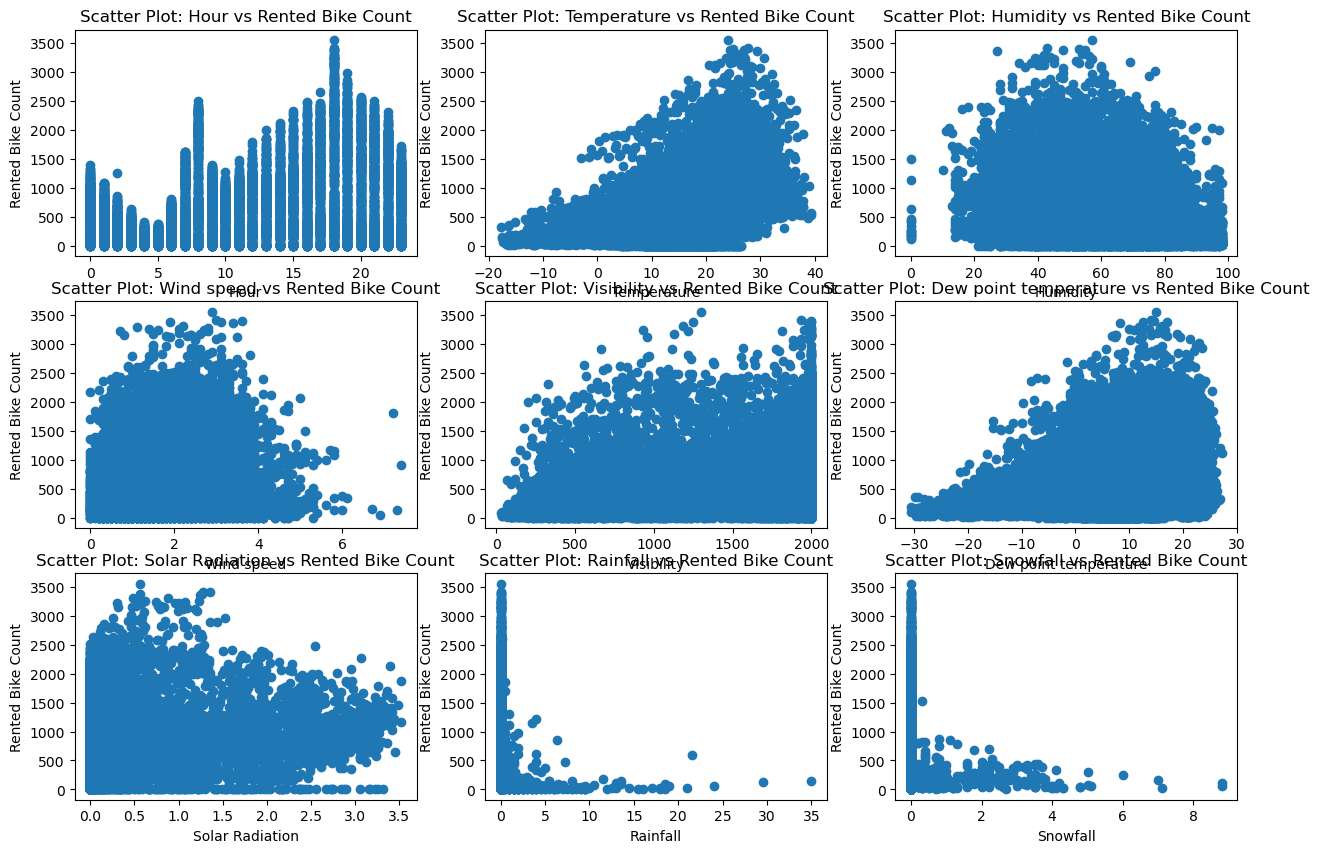

In [68]:
# Scatter plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):  # Excluding 'Rented Bike Count' itself
    plt.subplot(3, 3, i)
    plt.scatter(df[column], df['Rented Bike Count'])
    plt.xlabel(column)
    plt.ylabel('Rented Bike Count')
    plt.title(f'Scatter Plot: {column} vs Rented Bike Count')
plt.tight_layout()
plt.show()

### 3. Finding the correlation between variables

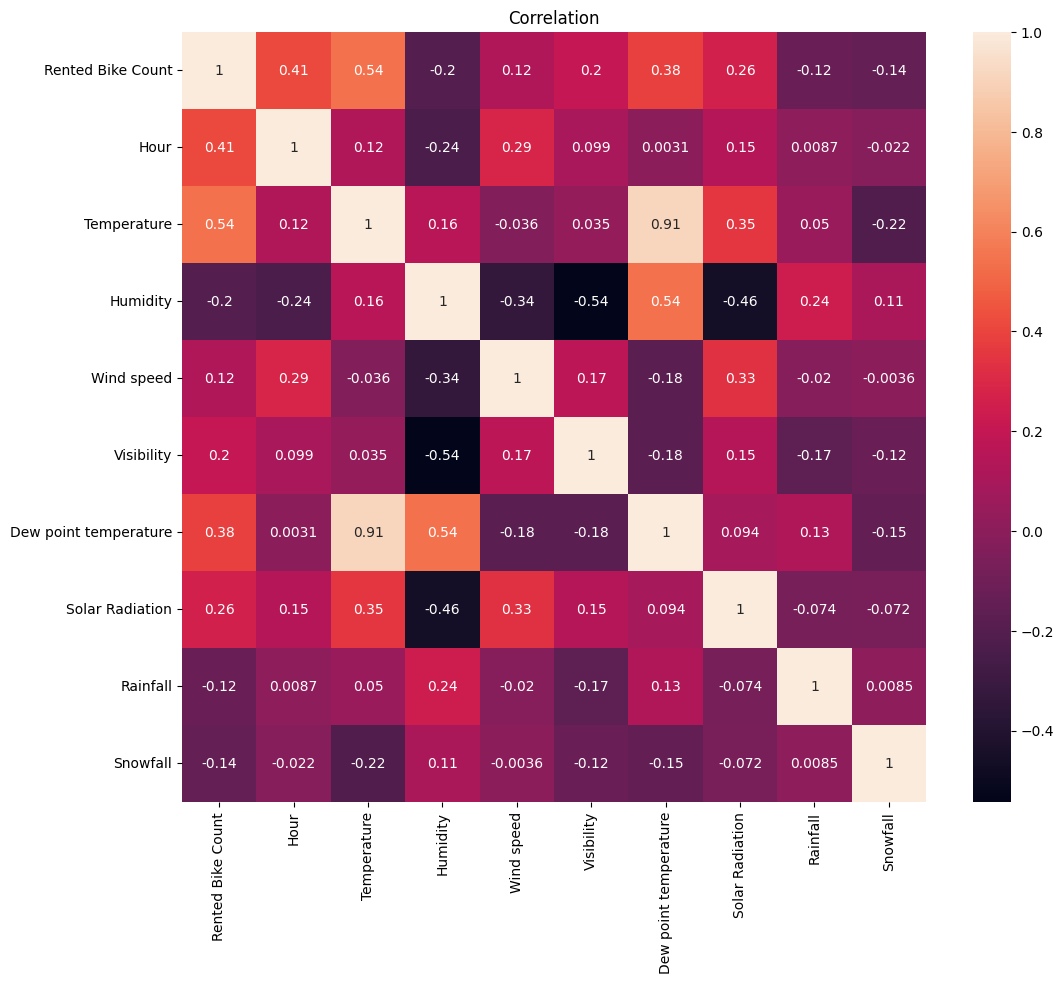

In [ ]:
# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation')
plt.show()


### 4. Normalizing values

We use standard scaler for normalizing the numerical features, except for the hour, as it might lose its discrete nature when normalized.

In [ ]:
# Standard Scaling for numerical features
scaler = StandardScaler()
numerical_cols.remove('Hour') 
numerical_df[numerical_cols] = scaler.fit_transform(numerical_df[numerical_cols])

In [ ]:
numerical_df.describe().round(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
count,8612,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00,8612.00
mean,2018-05-31 09:19:08.722712320,669.97,11.38,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.50,0.95,0.97
min,2017-12-01 00:00:00,0.00,0.00,-2.55,-2.85,-1.65,-2.30,-2.64,-0.65,-0.13,-0.17,0.00,0.00,0.00
25%,2018-02-28 00:00:00,189.00,5.00,-0.79,-0.80,-0.79,-0.82,-0.67,-0.65,-0.13,-0.17,1.00,1.00,1.00
50%,2018-05-30 00:00:00,486.00,11.00,0.05,-0.07,-0.21,0.42,0.07,-0.64,-0.13,-0.17,1.00,1.00,1.00
75%,2018-08-31 00:00:00,1032.00,17.00,0.80,0.76,0.56,0.93,0.82,0.41,-0.13,-0.17,3.00,1.00,1.00
max,2018-11-30 00:00:00,2398.00,23.00,2.24,1.94,5.48,0.93,1.78,3.38,30.63,19.81,3.00,1.00,1.00
std,NaN,592.11,6.92,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.12,0.22,0.18


### 5. Splitting data intro train and test subsets

Once the data is normalized, we proceed to split it the features in a X variable and the target feature in a Y variable. After this, we can split the two parameters into the train and test subsets

In [ ]:
y = numerical_df['Rented Bike Count']
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8612, dtype: int64

We also drop the Date feature as it won't be useful as an input for the regression model

In [ ]:
X = numerical_df.drop(columns=['Rented Bike Count', 'Date'])
X

,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,0,-1.498494,-1.044910,0.466085,0.930694,-1.643384,-0.650761,-0.132937,-0.173406,3,1,1
1,1,-1.523627,-0.996005,-0.882680,0.930694,-1.643384,-0.650761,-0.132937,-0.173406,3,1,1
2,2,-1.565516,-0.947100,-0.690000,0.930694,-1.651018,-0.650761,-0.132937,-0.173406,3,1,1
3,3,-1.582272,-0.898195,-0.786340,0.930694,-1.643384,-0.650761,-0.132937,-0.173406,3,1,1
4,4,-1.565516,-1.093815,0.562426,0.930694,-1.719728,-0.650761,-0.132937,-0.173406,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,-0.710986,-1.191625,0.851447,0.756927,-1.086074,-0.650761,-0.132937,-0.173406,0,1,1
8756,20,-0.778008,-1.044910,0.562426,0.930694,-1.055536,-0.650761,-0.132937,-0.173406,0,1,1
8757,21,-0.845030,-0.947100,-1.364383,0.878236,-1.055536,-0.650761,-0.132937,-0.173406,0,1,1
8758,22,-0.886919,-0.849290,-0.690000,0.699552,-1.047902,-0.650761,-0.132937,-0.173406,0,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5770, 12) (5770,)
(2842, 12) (2842,)


### 6. Build a machine learning model

Random Forest Regression is an ensemble technique used for predicting continuous numerical values. It works by combining the predictions of multiple decision trees, reducing overfitting and improving the model's overall accuracy.

* Ensemble method combining predictions from multiple decision trees.
* Leverages the strengths of various models for improved performance.
* Reduces overfitting and improves accuracy.


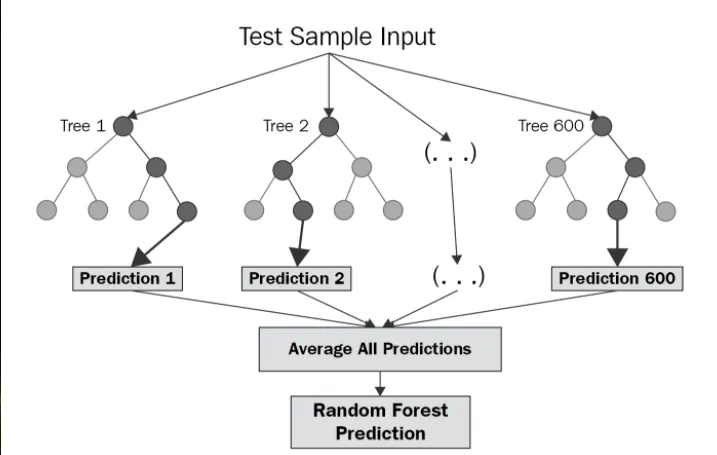

**Decision Tree Algorithm**

A decision tree algorithm is a supervised learning approach that uses a tree-like model to classify or predict a target variable based on features (independent variables). It works by recursively splitting the data into smaller and purer subsets based on the most significant features (Slatery, 2020). 

The process is executed as shown bellow:

1. **Starts with the root node:** The root node represents the entire dataset.
2. **Choose the best splitting feature:** The algorithm identifies the feature that best separates the data into subsets that are more homogeneous regarding the target variable. This selection involves metrics like variance reduction for regression.
3. **Create branches:** The root node splits into branches based on the chosen feature's possible values.
4. **Repeat for each branch:** The algorithm repeats steps 2 and 3 for each branch, recursively splitting the data further based on the most relevant features at each node.
5. **Leaf nodes:** The process continues until a stopping criterion is met, such as reaching a maximum depth or a sufficiently pure subset of data. These final nodes are called leaf nodes and represent the algorithm's predictions for the target variable.

**Decision Trees in Random Forests**

Random forests, however, leverage multiple decision trees to enhance the model's performance and reduce overfitting. Here's how it works:

1. **Train multiple trees:** The algorithm creates a collection of decision trees, typically by randomly sampling data points (with replacement) and features for each tree.
2. **Aggregate predictions:** At prediction time, each tree in the forest makes a prediction for a given data point. The final prediction is the average of these individual tree predictions (for regression) or the majority vote (for classification).


In this case we create a RandomForestRegressor instance. The parameters for this instance are set as follows:

* n_estimators=12: This sets the number of decision trees to be included in the forest. In this case, 12 trees will be created.
* random_state=0: This sets the random seed for the model. Using a fixed random seed ensures reproducibility, meaning we'll get the same results if we run the code multiple times.
* oob_score=True: This enables the calculation of the out-of-bag (OOB) score during training. This score is a performance estimation technique specifically used in bagging algorithms like Random Forest Regression to estimate the model's performance on unseen data and can be helpful for evaluating how well the model generalizes. It leverages the data points not used to train each individual tree for prediction, providing an internal validation measure.



In [ ]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=12, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=12, oob_score=True, random_state=0)

In [ ]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(X_test)
 
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae) 
 
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.818556841409502
Mean Absolute Error: 143.7319962467746
Mean Squared Error: 53368.7963337634
Root Mean Squared Error: 231.01687456496202
R-squared: 0.8463912418932416


In [ ]:
# Get the minimum and maximum values of target variable
min_target_value = numerical_df['Rented Bike Count'].min()
max_target_value = numerical_df['Rented Bike Count'].max()

print(f'Min target value: {min_target_value}\nMax target value: {max_target_value}')

# Normalize the error by the target variable range and express as a percentage
normalized_mae = (mae / (max_target_value - min_target_value)) * 100
normalized_rmse = (rmse / (max_target_value - min_target_value)) * 100


print(f"Normalized MAE (as %): {normalized_mae:.2f}%")
print(f"Normalized RMSE (as %): {normalized_rmse:.2f}%")

Min target value: 0
Max target value: 2398
Normalized MAE (as %): 5.99%
Normalized RMSE (as %): 9.63%


We can conclude that the random forest regression model is performing well based on the metrics. 

An **Out-of-Bag Score (OOB) of 0.8186** is a good R-squared value, indicating that the model explains  **81.86%** of the variance in the data it wasn't trained on (out-of-bag data). This suggests the model generalizes well to unseen data.

A **Mean Absolute Error (MAE) of 143.73** represents the average absolute difference between the predicted values and the actual target values. Since our target values range from 0 to 2398, an MAE of 143.73 is **moderate** because, on average, our model's predictions are off by around 143.73 rented bikes.

A **Root Mean Squared Error (RMSE) of 231.02** - This is similar to MAE but gives more weight to larger errors. The result here is also moderate.

Finally, a **R-squared of 0.8464** confirms a good model fit, since it means the model explains  **84.64%** of the variance in the data.

**Overall**, these metrics suggest that our random forest regression model is performing well. It generalizes well to unseen data and has a moderate average error. However, it's important to consider that in this case, an MAE of 143.73 might be still too high considering that the mean count of rented bikes is almost 700, which could make the predictions for bike stock to diverge by almost 20% from the real value in average. Further improvements can be made to the model so the error range is reduced, for example, making predictions with a even closer range from the mean, dropping values that are above 1000 or 1400, or adding complementary data from another datasets.

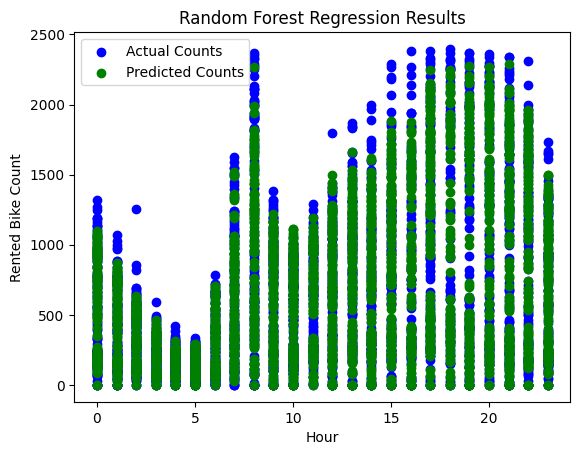

In [ ]:
plt.scatter(X_test['Hour'], y_test, color='blue', label='Actual Counts')  # Label for real points
plt.scatter(X_test['Hour'], predictions, color='green', label='Predicted Counts')  # Label for predicted points

plt.title("Random Forest Regression Results")
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

# Add legend
plt.legend()

plt.show()



The following graph represent **a portion of the random forest model, showcasing how individual decision trees might split the data based on features like temperature and potentially make predictions for rented bike counts.**

While the graph provides insights into a single tree's decision process, the power of random forests lies in combining predictions from multiple trees with potentially different splitting criteria, leading to a more robust and generalizable model.


We can visualize the desicion Trees used in this technique as shown bellow:

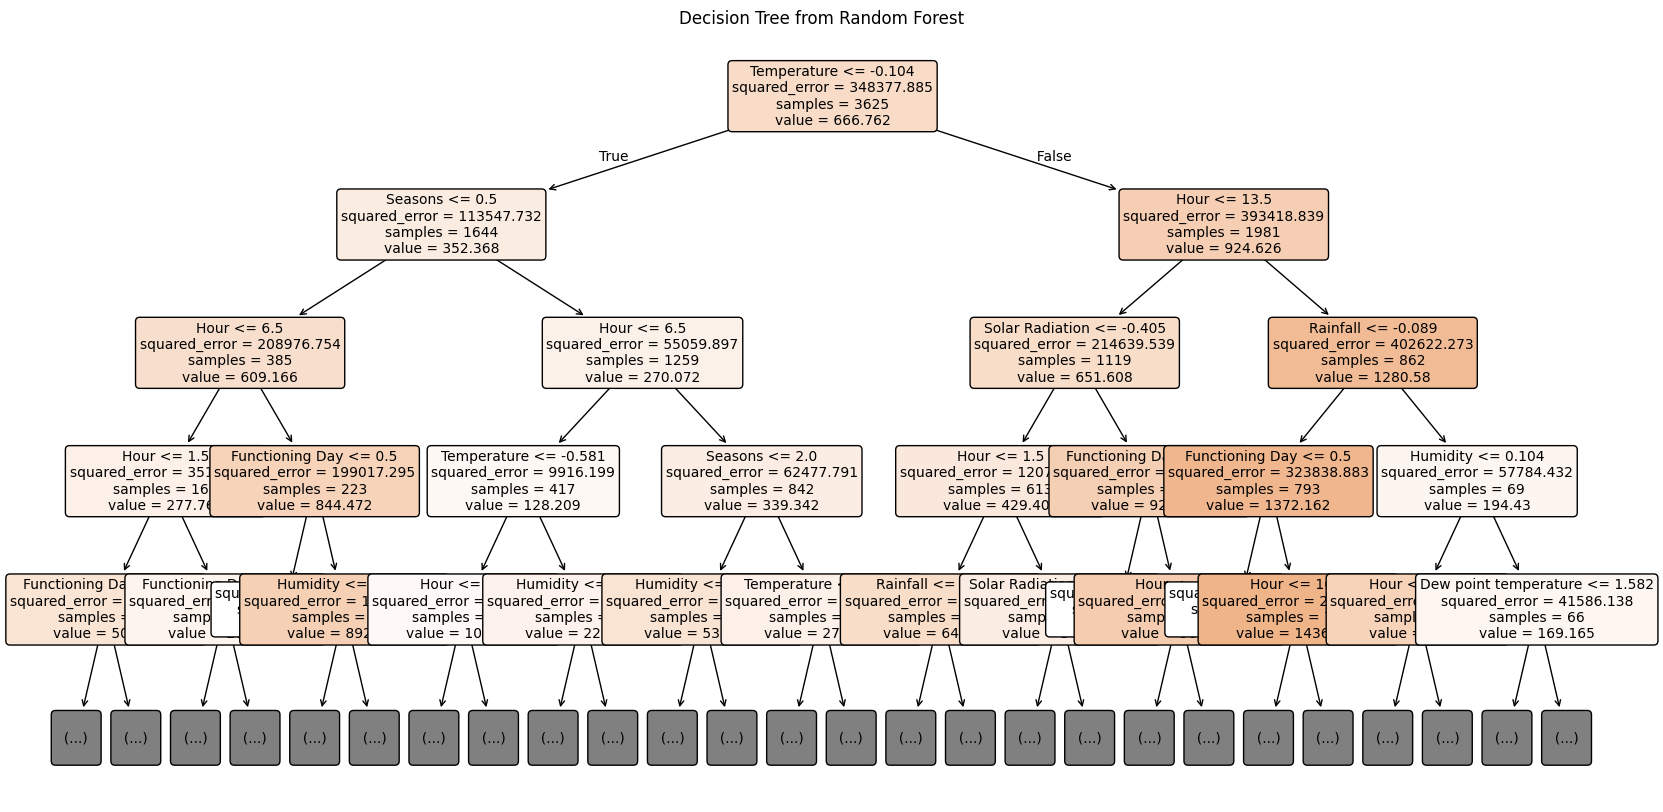

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10, max_depth= 4)
plt.title("Decision Tree from Random Forest")
plt.show()

### 7. Perform a cross-validation technique

In [ ]:
# Create r2 scorer using make_scorer
mae_Scorer = make_scorer(mean_absolute_error)

#if not specified, the metric evaluated is MSE in the case of regression models by default
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring= mae_Scorer)
scores

array([153.79888793, 146.35882438, 139.40431831, 140.45378394,
       145.73411323])

In [ ]:
# Create r2 scorer using make_scorer
r2_scorer = make_scorer(r2_score)

#if not specified, the metric evaluated is MSE in the case of regression models by default
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring= r2_scorer)
scores

array([0.83615045, 0.85361674, 0.85337158, 0.84979031, 0.84339961])

## VIII) Data Visualization

Apart from the visualizations already seen, we can visualize the frequency of the numerical data and the percentage of each class from the categorical variables. Moreover, we can visualize the results of the predicted values from our model versus the real test values having in the X axis each of the features from our dataset, so we can make sure that the model has adjusted appropriately the input data to the target variable and performs an accurate prediction in all of the dimensions of the problem.

<function matplotlib.pyplot.show(close=None, block=None)>

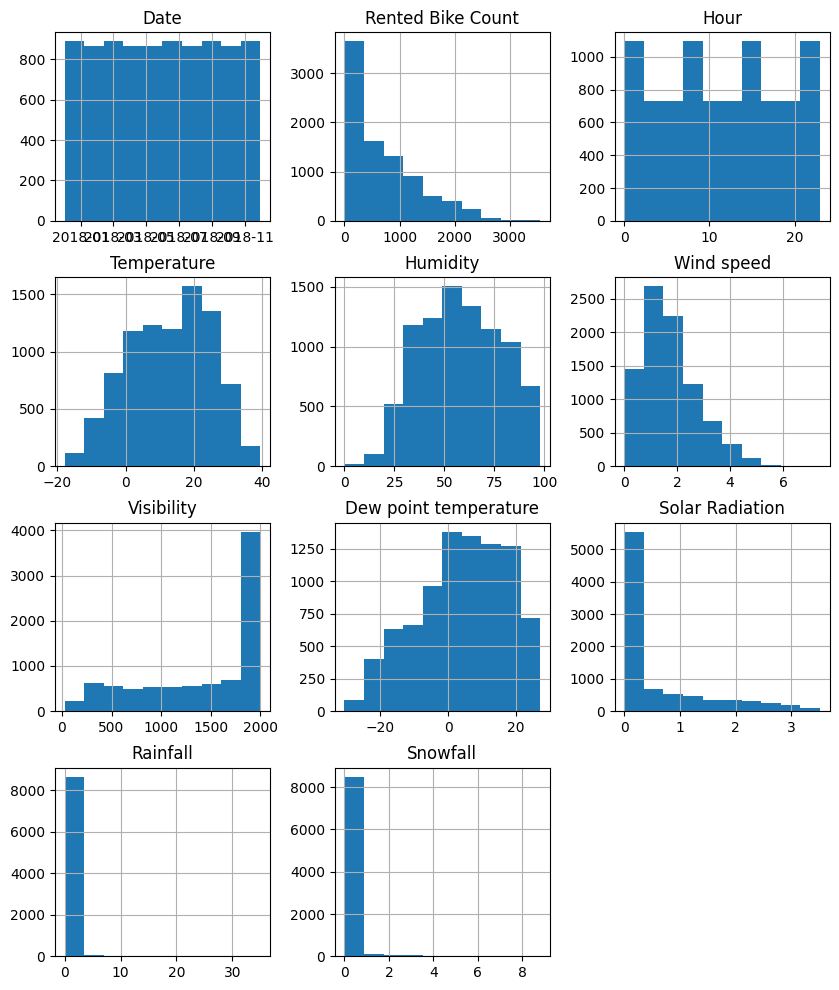

In [ ]:
df.hist(figsize=(10,12))
plt.show

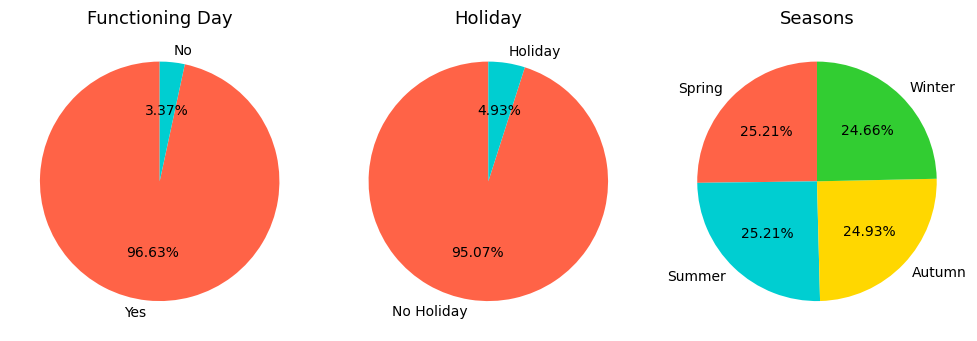

In [ ]:
# Create a figure with 2 rows and 2 columns (adjust as needed)
fig, axes = plt.subplots(1, 3, figsize=(10, 10))  # Adjust figsize for better visualization

# Plot pie chart for 'Functioning Day' (existing code)
gen_count = df['Functioning Day'].value_counts()
axes[0].pie(gen_count, labels=gen_count.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1'])
axes[0].set_title('Functioning Day', fontsize=13, fontweight='normal')

# Plot pie chart for Holiday
var1_counts = df['Holiday'].value_counts()
axes[1].pie(var1_counts, labels=var1_counts.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1'])
axes[1].set_title('Holiday', fontsize=13, fontweight='normal')

# Plot pie chart for Seasons
var2_counts = df['Seasons'].value_counts()
axes[2].pie(var2_counts, labels=var2_counts.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1', '#FFD700', '#32CD32'])
axes[2].set_title('Seasons', fontsize=13, fontweight='normal')

# Customize the layout 
plt.tight_layout()  # Adjust spacing between subplots

plt.show()

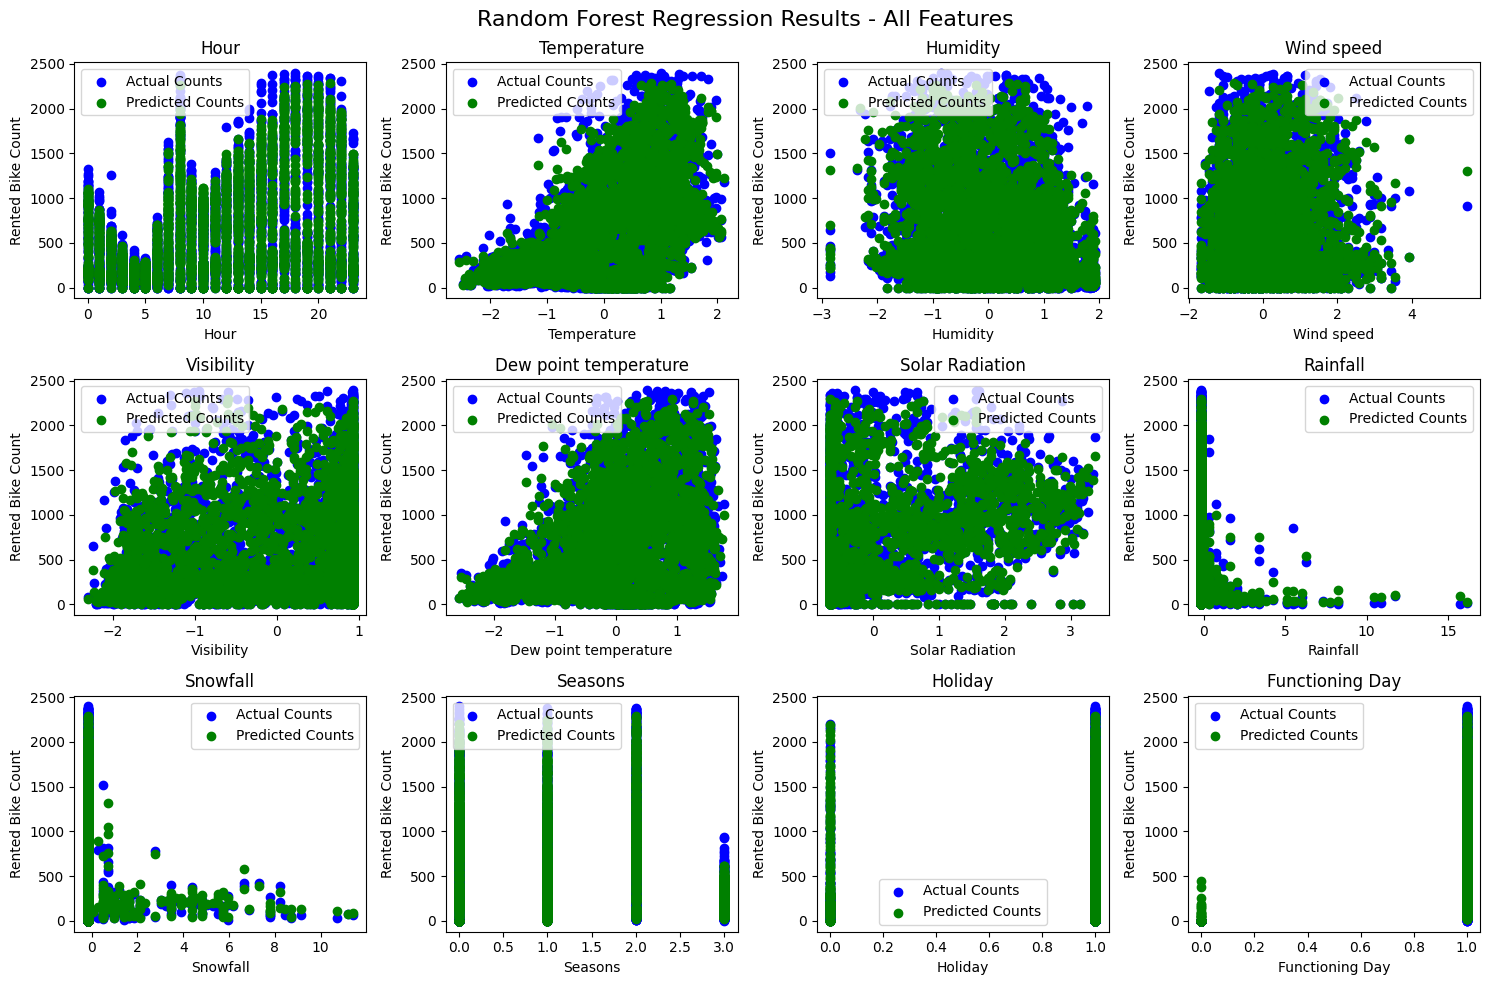

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions' contains your predicted values and X_test is your test data
num_features = len(X_test.columns)  # Get the number of features
rows, cols = (3, 4)  # Adjust rows and cols for a visually appealing layout (optional)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Create a figure with subplots

# Loop through features and create scatter plots
feature_index = 0
for i in range(rows):
    for j in range(cols):
        if feature_index >= num_features:
            break  # Exit the loop if all features are plotted

        feature_name = X_test.columns[feature_index]
        axes[i, j].scatter(X_test[feature_name], y_test, color='blue', label='Actual Counts')
        axes[i, j].scatter(X_test[feature_name], predictions, color='green', label='Predicted Counts')

        axes[i, j].set_title(feature_name)
        axes[i, j].set_xlabel(feature_name)
        axes[i, j].set_ylabel('Rented Bike Count')
        axes[i, j].legend()

        feature_index += 1

# Adjust layout (optional)
fig.suptitle("Random Forest Regression Results - All Features", fontsize=16)
plt.tight_layout()  # Adjust spacing between subplots

plt.show()


## IX) Utilization of Analysis Results

As per the results, we can demonstrate that our model is feasible for anticipating bike rental demand. The lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) depict that our predictions coordinate with real values, indicating higher accuracy. This precision empowers businesses to form strategic/educated choices with respect to inventory, operations, and various other aspects that will help in meeting the predicted demands. 

Additionally, the OOBs score is 0.818 which shows our model is comprehensive enough for unseen data, therefore helps in mitigating risks. This accurate data helps the marketing department in achieving customer satisfaction and organization goals.

Moreover, while the model performs decently (82% explanation of variance), the error (MAE of 143) is significant in the context of our problem (average bike count of 700). This means predictions could be off by an average of 20%, which might not be acceptable.  There's room for improvement by:

* Reducing overall error: Techniques like tuning the model or adding more data could bring the MAE down.
* Focusing on predictions near the average: Strategies like filtering out outliers or using models better suited for this task could improve accuracy for typical bike counts.

**To conclude**, the model's forecasted data elucidate that lower MSE, RMSE, and a respectable OOB score, leads to a strong foundation for discovering insights into business operations, specifically in effectively managing resources and enhancing customer-oriented proposals.

How ever, the model must be used with caution in some cases, specially in the low bike renting season, as the error could be unacceptable for those cases.


## References

 [1] E, S. V., Park, J., & Cho, Y. (2020). Using data mining techniques for bike sharing demand prediction in metropolitan city. Computer Communications, 153, 353–366. https://doi.org/10.1016/j.comcom.2020.02.007
 
 [2] 3.1. cross-validation: Evaluating estimator performance. scikit learn. (n.d.). https://scikit-learn.org/stable/modules/cross_validation.html 

 [3] Dutta, A. (2023, December 6). Random Forest regression in python. GeeksforGeeks. https://www.geeksforgeeks.org/random-forest-regression-in-python/ 

 [4] Slatery, K. (2020, March 14). Decision trees: Understanding the basis of Ensemble Methods. Medium. https://towardsdatascience.com/decision-trees-understanding-the-basis-of-ensemble-methods-e075d5bfa704 

